# Deep Learning (85837) - Exercise 3
**Task:** Multi-class Image Classification on STL-10

---

## Project Overview
This project involves solving a multi-class classification task using the **STL-10 dataset**. The mission is to implement, train, and compare five different types of Neural Network architectures using **PyTorch**. 

### The Dataset: STL-10
* **Classes:** 10 categories (Airplane, Bird, Car, Cat, Deer, Dog, Horse, Monkey, Ship, Truck).
* **Images:** Originally 96x96 pixels, which we will resize to 64x64 for computational efficiency.
* **Data Split:** We utilize the 'train' and 'test' splits, further subdividing the training data into 'train' and 'validation' sets.

### Project Goals
1. **Visualization:** Explore the dataset structure.
2. **Architecture Comparison:** Evaluate models ranging from simple Logistic Regression to complex Pre-trained MobileNetV2 architectures.
3. **Data Augmentation:** Implement techniques like random cropping and horizontal flipping to improve model generalization.

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Part 1: Data Visualization
In this section, we visualize the STL-10 dataset to understand the variety and quality of the images in each class.

**Requirements:**
* Plot 4 random examples from each of the 10 classes.
* Organize the images in a $10 \times 4$ grid.
* Label each row with the corresponding class name.

In [2]:
# Load the training set
train_ds = torchvision.datasets.STL10(
    root='./data', 
    split='train', 
    download=True, 
    transform=transforms.ToTensor() # Converts images to PyTorch tensors
)

# Class names for labeling rows
classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

100.0%


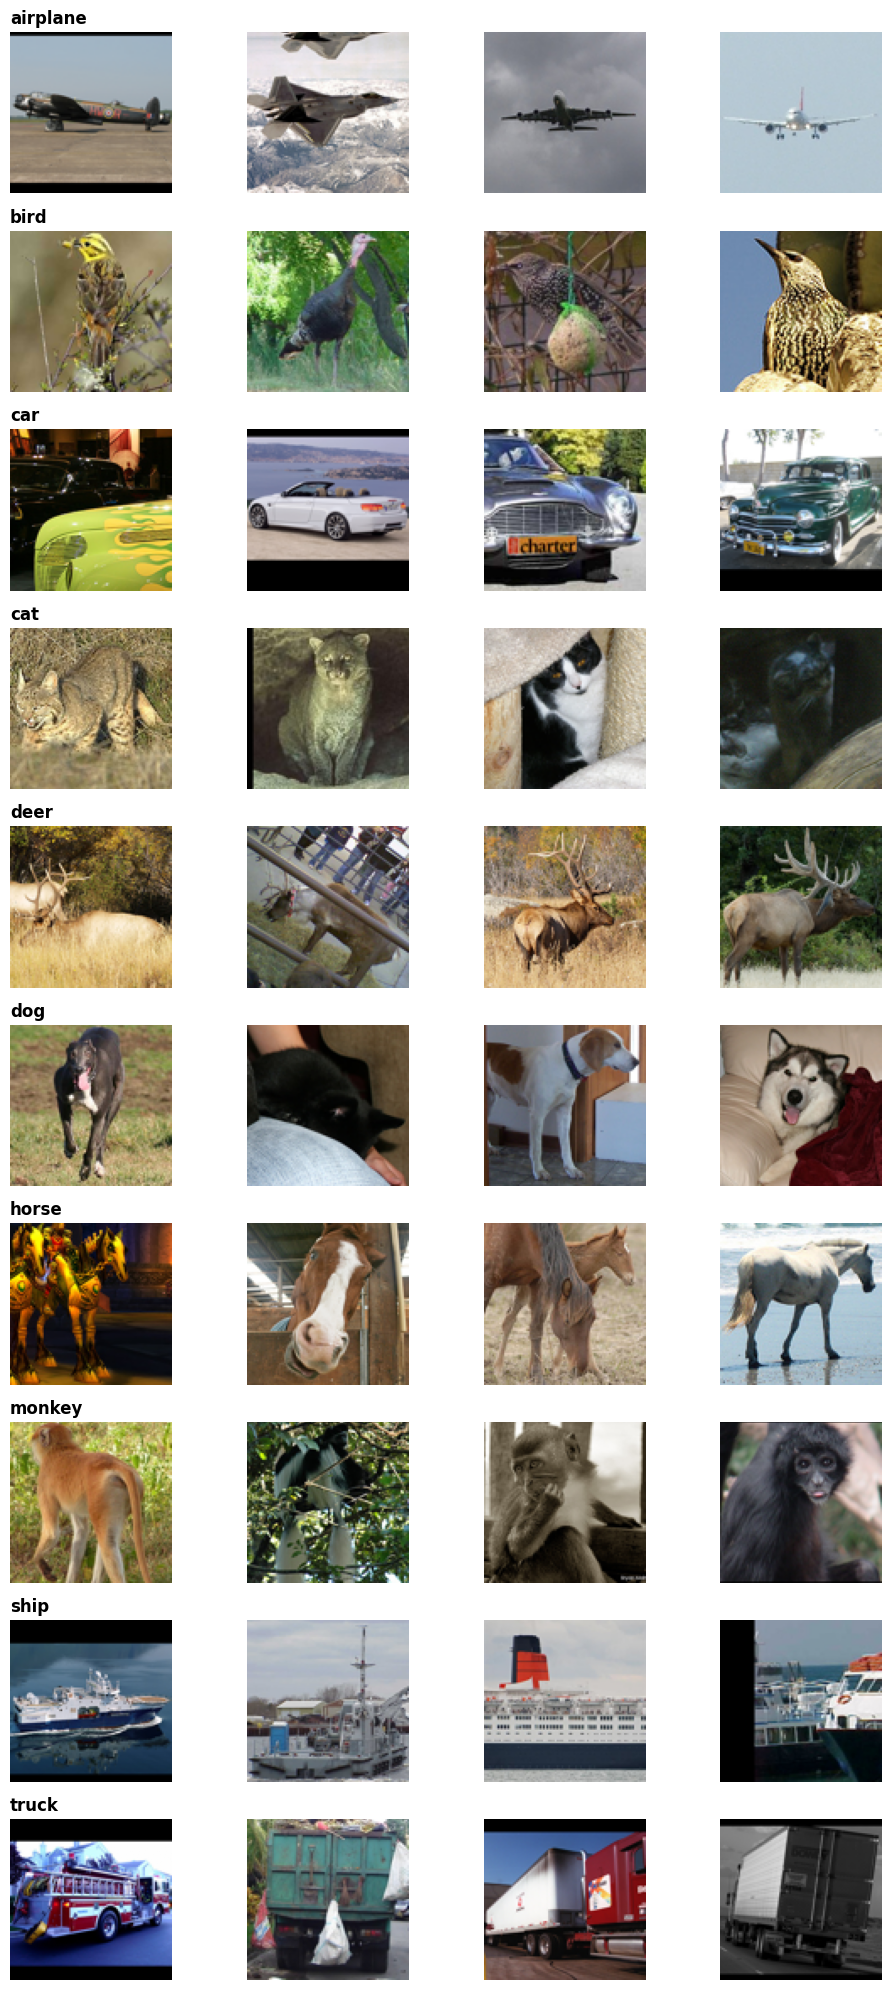

In [4]:
# Create the 10x4 grid [cite: 13]
fig, axes = plt.subplots(10, 4, figsize=(10, 20))

for i, class_name in enumerate(classes):
    # Get indices for this specific class
    indices = [idx for idx, (_, label) in enumerate(train_ds) if label == i]
    
    for j in range(4):
        img, _ = train_ds[indices[j]]
        # Convert from (C, H, W) to (H, W, C) for plotting
        img_np = img.permute(1, 2, 0).numpy()
        
        axes[i, j].imshow(img_np)
        axes[i, j].axis('off')
        
        # Label each row with the class name [cite: 14]
        if j == 0:
            axes[i, j].set_title(class_name, loc='left', fontweight='bold')

plt.tight_layout()
plt.show()